In [34]:
#Dependencies
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv(r'C:\Users\A K SHARMA\Downloads\11167_15520_bundle_archive\train.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [35]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [36]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [37]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

# from keras.utils import to_categorical
# y = to_categorical(y)
print(X.shape)
print(y.shape)

(2000, 20)
(2000, 4)


In [38]:
#TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [39]:
# BUILDING NEURAL NETWORK

# 1. Building model

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Specify loss function and optimizer

''' model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

This is Sparse cross entropy,which  is used when your output is an integer like 0,1,2,3,..13. But your output is onehot encoded
[0,0,...1,0].

So use categorical cross entropy.

'''
# CATEOGORICAL CROSS ENTROPY

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
# TRAIN THE MODEL

history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1800/1800 [==============================] - 2s 1ms/step - loss: 1.5254 - accuracy: 0.2089
Epoch 2/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.4033 - accuracy: 0.2606
Epoch 3/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3242 - accuracy: 0.3244
Epoch 4/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.2593 - accuracy: 0.3944
Epoch 5/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.1963 - accuracy: 0.4522
Epoch 6/100
1800/1800 [==============================] - 0s 25us/step - loss: 1.1338 - accuracy: 0.5067
Epoch 7/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.0688 - accuracy: 0.5467
Epoch 8/100
1800/1800 [==============================] - 0s 33us/step - loss: 1.0047 - accuracy: 0.5811
Epoch 9/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.9393 - accuracy: 0.6083
Epoch 10/100
1800

In [41]:
# PREDICTION

y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [42]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 90.0


In [43]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 134us/step - loss: 0.0551 - accuracy: 0.9906 - val_loss: 0.2268 - val_accuracy: 0.9050
Epoch 2/100
1800/1800 [==============================] - 0s 25us/step - loss: 0.0552 - accuracy: 0.9889 - val_loss: 0.2367 - val_accuracy: 0.8950
Epoch 3/100
1800/1800 [==============================] - 0s 29us/step - loss: 0.0553 - accuracy: 0.9867 - val_loss: 0.2272 - val_accuracy: 0.8950
Epoch 4/100
1800/1800 [==============================] - 0s 41us/step - loss: 0.0543 - accuracy: 0.9917 - val_loss: 0.2406 - val_accuracy: 0.8800
Epoch 5/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.0525 - accuracy: 0.9900 - val_loss: 0.2327 - val_accuracy: 0.8950
Epoch 6/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.0533 - accuracy: 0.9883 - val_loss: 0.2236 - val_accuracy: 0.9000
Epoch 7/100
1800/1800 [==============================] - 0s 27us/step - loss

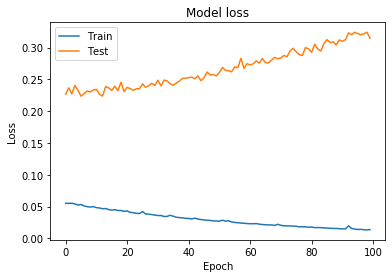

In [46]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()